In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [11]:
sep_coins = cv2.imread('DATA/pennies.jpg')

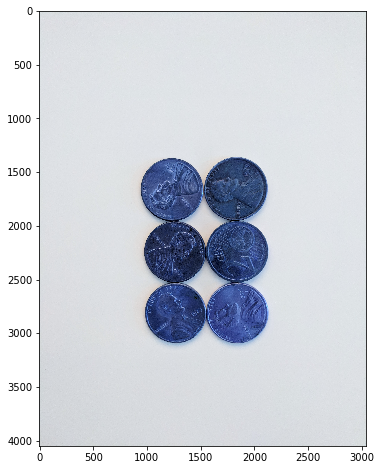

In [12]:
display(sep_coins)

In [13]:
blur=cv2.medianBlur(sep_coins,ksize=25)

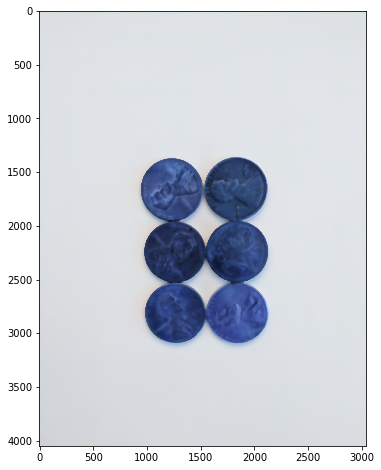

In [14]:
display(blur)

In [15]:
gray=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

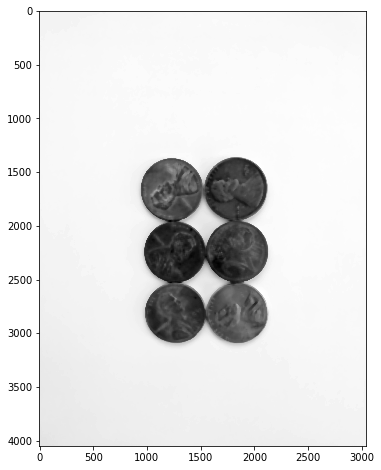

In [17]:
display(gray,cmap='gray')

In [20]:
ret,thresh=cv2.threshold(gray,160,255,cv2.THRESH_BINARY_INV)

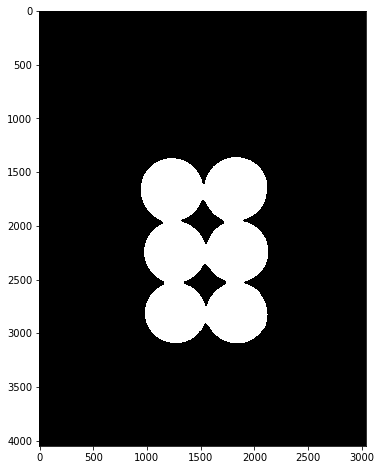

In [21]:
display(thresh,cmap='gray')

In [22]:
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,255,10)

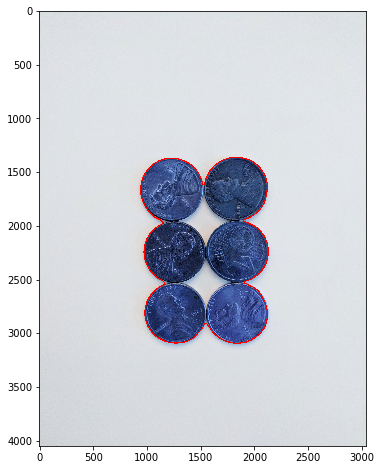

In [26]:
display(sep_coins)

In [27]:
img=cv2.imread('DATA/pennies.jpg')

In [28]:
blur=cv2.medianBlur(img,ksize=35)

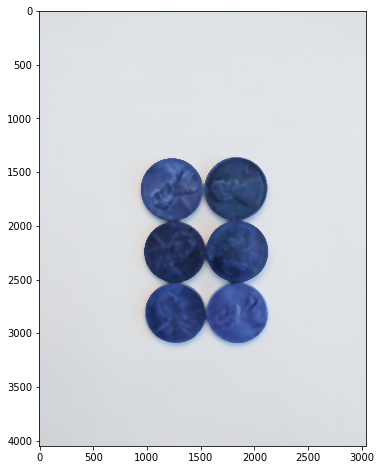

In [29]:
display(blur)

In [30]:
black=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

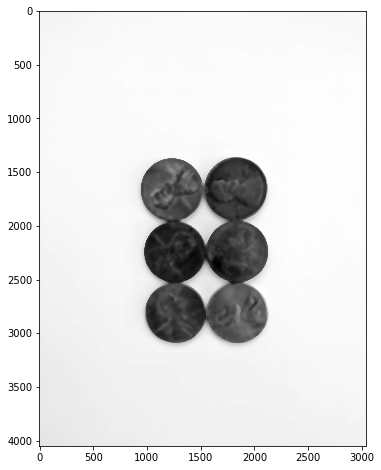

In [31]:
display(black,cmap='gray')

In [32]:
ret,thresh=cv2.threshold(black,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

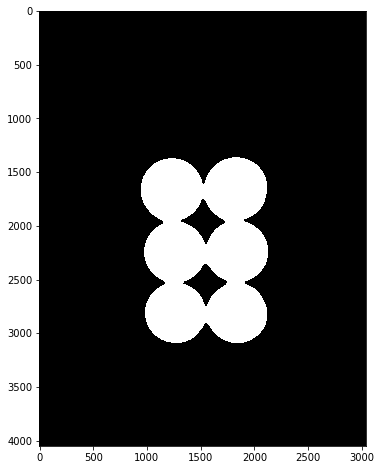

In [33]:
display(thresh,cmap='gray')

In [34]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

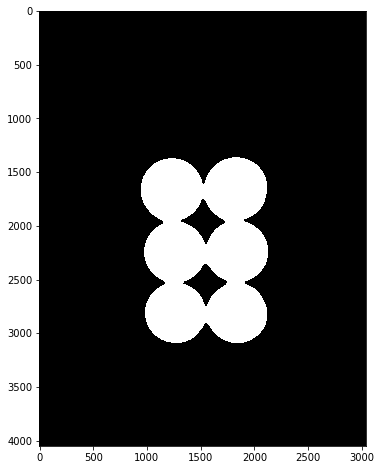

In [36]:
display(opening,cmap='gray')

In [37]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

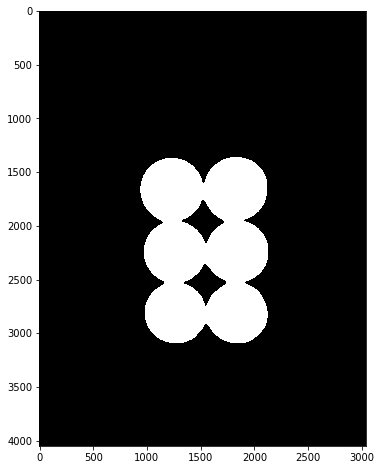

In [38]:
display(sure_bg,cmap='gray')

In [39]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

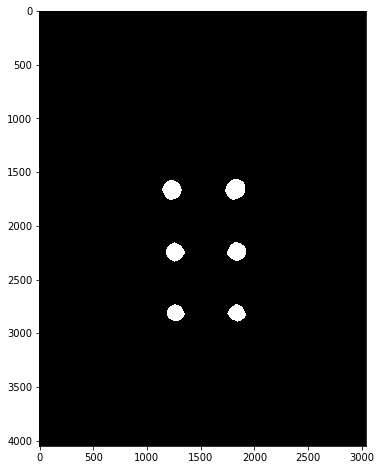

In [40]:
display(sure_fg,cmap='gray')

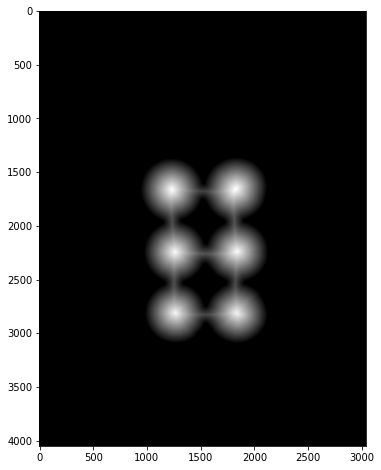

In [41]:
display(dist_transform,cmap='gray')

In [44]:
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)

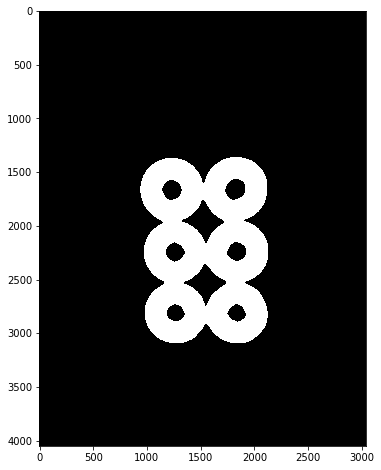

In [45]:
display(unknown,cmap='gray')

In [48]:
ret,markers=cv2.connectedComponents(sure_fg)

markers=markers+1

markers[unknown==255]=0

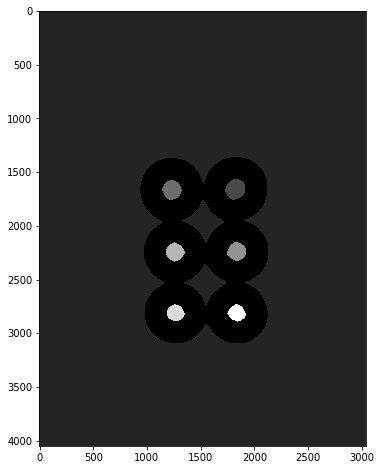

In [49]:
display(markers,cmap='gray')

In [50]:
markers=cv2.watershed(img,markers)

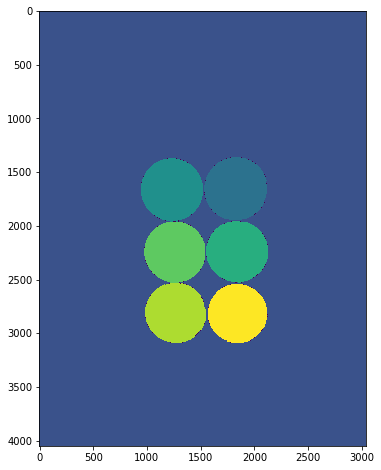

In [51]:
display(markers)

In [52]:
image,contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

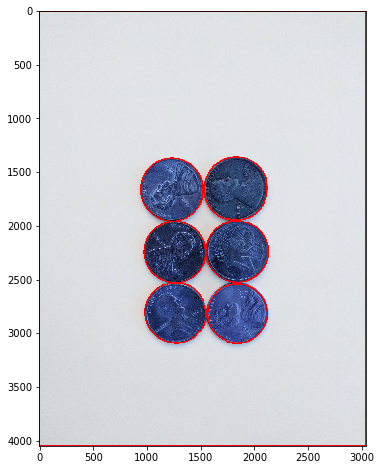

In [53]:
display(img)